# Phishing Detection Feature Engineering

This notebook will create, visualize and explain some of the thinking behind the feature engineering.
It will:
- Create a new dataset of features
- Provide visualtizations and basic analysis of the features
- Output this dataset to a .csv file for use in a model

First we import the libraries and data
We are labeling a Phishing url as 1 and a non-phishing as 0

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [5]:
data = pd.read_csv('phishing_site_urls.csv')
data['Label'] = data['Label'].map({'bad': 1, 'good': 0})

                                                      URL Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3       mail.printakid.com/www.online.americanexpress....   bad
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad
...                                                   ...   ...
549341                                    23.227.196.215/   bad
549342                                 apple-checker.org/   bad
549343                                  apple-iclods.org/   bad
549344                                 apple-uptoday.org/   bad
549345                                  apple-search.info   bad

[549346 rows x 2 columns]


# Simple Features

- Number of periods in the URL
  - Multiple subdomains are uncommon amongst legitimate urls.
- Number of slashes
  - Large numbers of slashes to direct you all to long routes is common for Phishing urls
- Length of the URL
  - Common url's have smaller lengths than most Phishing URLs
- Number of numbers in the URL
  - Phishing urls commonly contain numbers this is less common with legitimate urls
- firstdigit
  - Maybe Phishing websites start with digits more often

In [6]:
data['periods'] = data['URL'].apply(lambda url: url.count('.'))
data['slashes'] = data['URL'].apply(lambda url: url.count('/'))
data['length'] = data['URL'].apply(lambda url: len(url))
data['numberCount'] = data['URL'].apply(lambda url: sum(c.isdigit() for c in url))
data['firstdigit'] = data['URL'].apply(lambda url: int(url[0].isdigit()))

# More Advanced and Creative Features
These are features that contain more advanced concepts such as IP addresses or URL domains.

- Contains an IP address
- Number of semicolons
  - Websites can pass information using the pattern ?variable=value;variable2=value2
- Number of domains such of .com, .ca and .net
  - Phishing websites commonly contain many domains

In [8]:
data['IP'] = data['URL'].apply(lambda url: int(re.search('(?:\d{1,3}\.){3}\d{1,3}', url) is not None))
data['semicolon'] = data['URL'].apply(lambda url: url.count(';'))

domains = ['.com', '.net', '.ca', '.html', '.exe', '.xyz', '.php', '.rar']
data["domain"] = data['URL'].apply(lambda url: sum(substring in url for substring in domains))
data["hash"] = data['URL'].apply(lambda url: int(re.search('[0-9a-f]{64}|[0-9a-f]{32}', url) is not None))
print(data)

                                                      URL  Label  periods  \
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...      1        6   
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      1        5   
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....      1        7   
3       mail.printakid.com/www.online.americanexpress....      1        6   
4       thewhiskeydregs.com/wp-content/themes/widescre...      1        1   
...                                                   ...    ...      ...   
549341                                    23.227.196.215/      1        3   
549342                                 apple-checker.org/      1        1   
549343                                  apple-iclods.org/      1        1   
549344                                 apple-uptoday.org/      1        1   
549345                                  apple-search.info      1        1   

        slashes  length  numberCount  firstdigit  IP  semicolon  domain  ha

# Correlation Matrix
Show how these features well these features correlate to the Label

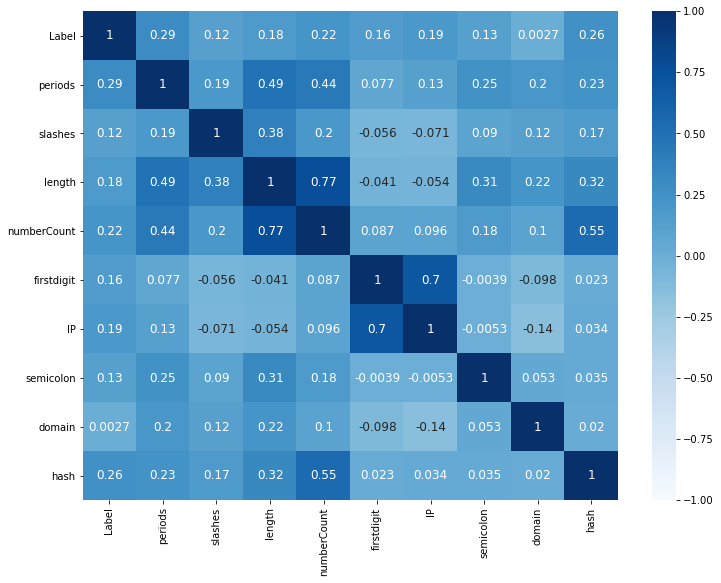

In [9]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 12}, cmap='Blues', vmin=-1, vmax=1)
plt.show()

In [79]:
data.to_csv('data_featured.csv')